In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

#sklearn.preprocessing 내 다양한 re-scaling 방법
#scale(X): 기본 스케일. 평균과 표준편차 사용
#robust_scale(X): 중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화
#minmax_scale(X): 최대/최소값이 각각 1, 0이 되도록 스케일링
#maxabs_scale(X): 최대절대값과 0이 각각 1, 0이 되도록 스케일링

In [2]:
# set seed for reproducibility
np.random.seed(0)

In [3]:
#re-scaling 방법에 따라 값이 어떻게 변환되는지 간단히 살펴보기
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
##arange함수 : 9라는 것은 0부터 8까지 9개의 수를 float의 형태로 list를 만드는 것
##reshape는 -1,1이면 1열로 하되 행을 자동적으로 조정이 되게끔 한다.

x = np.vstack([x, [20]])  # outlier
##vstack은 x와 [20]을 합쳐주는 것이다. (1차원을 기준으로 수행) 밑으로 붙인다.
##hstack도 합쳐주는 것인데 2차원을 기준으로 수행한다. 다시 말해 옆으로 붙인다.

df1 = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)","maxabs_scale(x)"])
##robust, minmax, maxabs등등의 데이터 전처리 방법은 이상치가 있는 데이터의 표준화에 쓰이는 방법들이다.
##robustscaler : 중앙값이 0, IQR이 1이 되도록 반환
##minmaxscaler : 최대값이 각각 1, 최소값이 0이 되도록 반환
##maxabsscaler : 0을 기준으로 절대값이 가장 큰 수가 1 또는 -1이 되도록 반환

In [5]:
df1

x  scale(x)  robust_scale(x)  minmax_scale(x)  maxabs_scale(x)
0  -3.0 -0.950995        -1.000000         0.000000            -0.15
1  -2.0 -0.789809        -0.777778         0.043478            -0.10
2  -1.0 -0.628624        -0.555556         0.086957            -0.05
3   0.0 -0.467438        -0.333333         0.130435             0.00
4   1.0 -0.306253        -0.111111         0.173913             0.05
5   2.0 -0.145067         0.111111         0.217391             0.10
6   3.0  0.016119         0.333333         0.260870             0.15
7   4.0  0.177304         0.555556         0.304348             0.20
8   5.0  0.338490         0.777778         0.347826             0.25
9  20.0  2.756273         4.111111         1.000000             1.00

robust_scale은 scaling을 해도 outlier인지를 확실하게 알 수 있게 하였고 minmax scale은 다른 변수들에 비해 멀리 떨어져있는 것으로 outlier인 것을 알 수 있다. 만약에 outlier가 좀 크다 그러면 minmax보다는 robust로 scaling을 하는 것이 좋다.

Min-Max Scaling

In [6]:
#서로 다른 분포의 랜덤 데이터 생성
df2 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000) #정규분포 
})

In [7]:
#정규화
scaler = preprocessing.MinMaxScaler()
scaled_df2 = scaler.fit_transform(df2) #scaled된 데이터가 numpy형태로 df2에 저장이 된다. 
scaled_df2 = pd.DataFrame(scaled_df2, columns=['x1', 'x2', 'x3'])

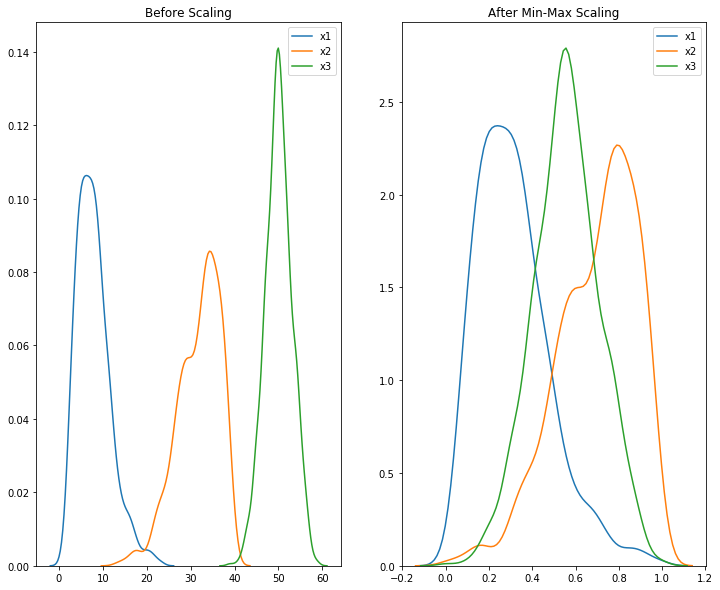

In [8]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1) #x축의 범위로 다르고 높이도 다르다. 

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)
plt.show()

##서로 다른 피처를 범주의 값을 같게함. SVM, kNN에서 주로 쓰임.
##outlier에 주의해야한다. 

Standardizing

In [9]:
#서로 다른 정규분포를 따르는 랜덤 데이터 생성
df3 = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000) #normal 분포로 만들어놓았다. 
})

In [10]:
#정규화
scaler = preprocessing.StandardScaler() ##각 변수들을 standardization 공식에 넣어준다.
scaled_df3 = scaler.fit_transform(df3)
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x1', 'x2', 'x3'])

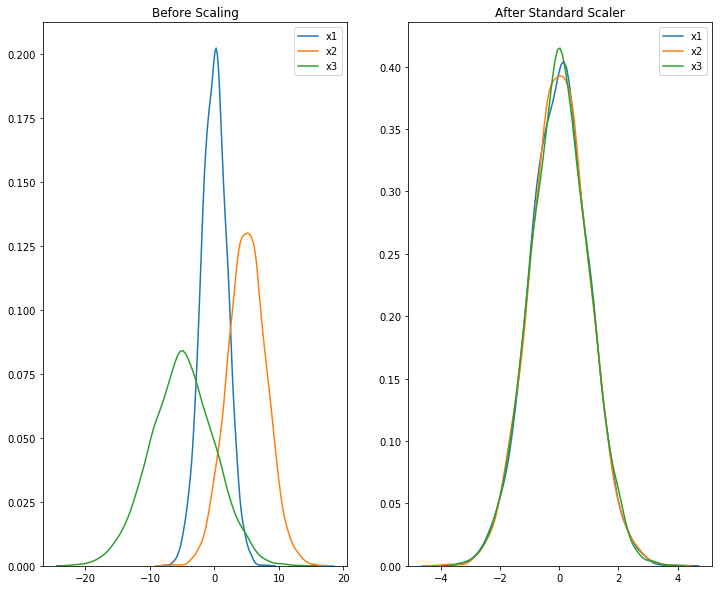

In [11]:
#정규화 전후 결과 비교
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df3['x1'], ax=ax1)
sns.kdeplot(df3['x2'], ax=ax1)
sns.kdeplot(df3['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df3['x1'], ax=ax2)
sns.kdeplot(scaled_df3['x2'], ax=ax2)
sns.kdeplot(scaled_df3['x3'], ax=ax2) 
##평균과 분산을 맞춰주기 때문에 그래프가 일치되어서 나온다. 
plt.show()

##데이터의 피처를 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
##선형회귀, 로지스틱 회귀 등에서 주로 쓰인다. 